<a href="https://colab.research.google.com/github/HarshSonaiya/DL/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CONVOLUTION NEURAL NETWORKS (CNNs):**

Convolutional Neural Networks (CNNs) are a class of deep neural networks specifically designed for processing structured grid data like images. They automatically learn important features like edges, textures, and patterns in various images.

Types of Images :

1) Gray Scale Images: Single-channel images where each pixel represents intensity, often with shape (28x28x1) for simple images like digits.

2) RGB Images: Three-channel images where each pixel has three values corresponding to Red, Green, and Blue channels, typically represented as (228x228x3).

What are Convolutions ?

Convolutions are mathematical operations applied to images to detect patterns such as edges, textures, and other features. These operations are performed by sliding a filter (or kernel) across the image, producing a feature map that highlights specific characteristics.
The edges or other patterns can be identified by the change in the intensity values of a pixel that which are the primary feature of an image.

Convolution operations are carried out with the help of filters

What are filters ?

Filters are special matrices that are applied to the image to extract features. Different filters detect different features, such as horizontal, vertical, or diagonal edges, or more complex patterns as the network gets deeper.

eg)


```
 [  [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1] ]
```
This filter helps to identify horizontal edges in the image

How ?

Image is a grid of intensity values on which features are convoled in order to get a feature map which helps us to identify where Horizontal edges are present.


```
[ [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0],
  [255, 255, 255, 255,255, 255],
  [255, 255, 255, 255, 255, 255],
  [255, 255, 255, 255, 255, 255]  ]
```



  This is an image and "" * "" is the convolution operator

We place the filter on the image first 3x3 submatrix from the top left corner and multiply elements at the same position i.e.

```
[  [0 x -1, 0 x -1, 0 x -1],         [ [0, 0, 0],  
   [0 x 0,  0 x 0,  0 x 0],       =    [0, 0, 0],
   [0 x 1,  0 x 1,  0 x 1]  ]          [0, 0, 0] ]
```



Then these values are added and the result is the intenity value of the first cell in the feature map similarly values for all the cells of the feature map are calculated which will look like this:


```
feature_map = [ [0, 0, 0, 0],
                [255, 255, 255, 255],
                [255, 255, 255, 255],
                [0, 0, 0, 0], ]
```



Here in cells with 255 + 255 + 255 result is 255 as it is the maximu possible intensity value for an pixel.

Similarly we can use different pre defined filters to detect edges in an Image

In CNNs, filters are initialized with random values. During training, the network learns by adjusting the filter values (through backpropagation) to better capture features relevant to the task. This process helps CNNs automatically learn the best set of filters for edge detection, textures, and more complex patterns.

Checkout deeplizard.com

The size of the feature map depends on the image size, filter size, stride, and padding. Without padding, the feature map's size is reduced, calculated as (n - m + 1), but padding adds extra pixels to preserve the image dimensions after convolution.

**What is Padding ?**

In the above convolution operation example, on applying filter of size (mxm) to an image of size (nxn) the feature map we obtain is of size (n-m+1 , n-m+1). Here the pixels in the boundaries of the grid i.e. first row from top and bottom and first column from left and right are not able to contribute much and it also becomes difficult to detect edges if they are present in these four regions. It also leads to loss of information.

In CNNs, padding refers to the addition of extra pixels (usually with a value of zero) around the border of an image before applying a convolution operation. This is done to control the spatial dimensions of the output feature map and to avoid losing information from the edges of the image.

An 3 x 3 image after padding becomes a 4 x 4image which looks like :


An on this new image filter is applied.

```
[ [2, 3, 4],                    [ [0, 0, 0, 0],
  [220, 223, 224],         =>     [0, 2, 3, 4],  
  [2, 3, 4]  ]                    [0, 220, 223, 224],
                                  [0, 2, 3, 4] ]

```

**Types of Padding:**

1. Valid Padding (padding='valid'):
  
   No padding is applied.
   
   The output size is reduced based on the filter size.
   
   Formula for output size: (n - m + 1) (n - m + 1).

2. Same Padding (padding='same'):
   
   Padding is applied to maintain the input and output size the same (or as close as possible).
  
   Extra rows/columns are added to the borders of the image.
   
   Formula for output size: nxn, i.e., the output has the same dimensions as the input.

In keras we can apply choose if we want to apply padding or not


In [ ]:
! pip install tensorflow
! pip install keras

^C


In [11]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from keras import Sequential
from keras.datasets import mnist

In [4]:
#Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
model = Sequential()

# CNN without padding
# Here 32 represents filters (learnable kernels), each detecting different features.
# (3,3) is the size of the filter and relu activation function is used to convert all
# negative values to zero
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'))

# Flattens the output of the previous convolutional layers (2D feature maps) into a 1D vector,
# to be fed into the fully connected layers.
model.add(Flatten())

# Adds a fully connected (dense) layer with 128 neurons.
# Activation function is ReLU to add non-linearity.
# This layer learns high-level features from the flattened vector.
model.add(Dense(128,activation='relu'))

# Output layer with 10 neurons, one for each class in a 10-class classification problem (e.g., digits 0-9 in MNIST).
model.add(Dense(10,activation='softmax'))

In [6]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 22, 22, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 15488)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,982,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,002,698 (7.64 MB)

 Trainable params: 2,002,698 (7.64 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model = Sequential()

# padding='same': Padding is added so the output feature map has the same size as the input.
model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same', activation='relu'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [10]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,231,498 (12.33 MB)

 Trainable params: 3,231,498 (12.33 MB)

 Non-trainable params: 0 (0.00 B)

**What are Strides?**

In convolution operations, the stride refers to how much the filter (kernel) shifts across the input image. When the stride is set to 1, the filter shifts by one position at a time, moving across the entire input image both horizontally (left to right) and vertically (top to bottom).

We can change the stride to a value of our choice. On increasing the value of stride the size of feature map further reduces which is given by [(n-m)/s + 1] and in case of padding [ (n + 2p - m)/s  + 1]

**What are its effects?**

A stride value of 1 helps to get precise results as there is no losso of information if padding is applied with it. But this increases the computation complexity and training time.

A stride value greater than 1 can help to reduce the computational complexity / cost as well reduce the time for training. Another benefit is that it can help to reduce overfitting. But here the issue is precision is less as compared to
in the case of stride = 1. Also we need to check if stride greater than 1 helps to consider all the cell of the image or not eg image of size 7x6.




In [7]:
model = Sequential()

# strides=(2,2) to shift the filter by 2 pixels in both horizontal and vertical directions.
model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2), activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=(2,2), activation='relu'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 7, 7, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,770 (335.04 KB)

 Trainable params: 85,770 (335.04 KB)

 Non-trainable params: 0 (0.00 B)

### **Problems in Convolution Operation:**

1) **Memory Consumption:**

   **Issue:** Convolutional Neural Networks (CNNs) require significant memory, especially as the depth (number of layers) and size of feature maps increase. Each convolutional layer produces multiple feature maps, which need to be stored and processed during forward and backward propagation.

   **Why It Happens:** The need for large numbers of filters, high-resolution input images, and deep network architectures contribute to the memory consumption. Intermediate feature maps and the gradients during backpropagation are also stored, which increases memory usage.

   **Impact:** This can result in hardware limitations, especially when training on large datasets or high-resolution images, making it difficult to train deep CNNs on machines with limited GPU memory.
   
   **Solutions:**

   **Use Stride > 1**

   **Use of pooling layers**
   
   **Batching:** Training on smaller batches of images can also reduce memory requirements.

2) **Translation Variance:**

 **Issue:** CNNs are not inherently invariant to shifts/translations.

 Translation Variance refers to the sensitivity of a Convolutional Neural Network (CNN) to shifts or translations of features within an image. In other words, if an object or feature in an image is moved (translated) slightly from its original position, the CNN might fail to recognize it correctly or produce a different response. This happens because the convolution operation detects features based on fixed spatial positions, so even a small change in the feature's position can affect the activation in the convolutional layers.

 **Why It Happens:** Convolutions apply filters at fixed positions, and if the feature (like an edge or object) moves, it may not align with the learned filters in the same way. This causes the output to vary even though the essential feature remains the same but in a different location.

 **Impact:** This variance to translations can affect the generalization of CNNs and their ability to accurately detect features irrespective of position in an image.
   
 **Solutions:**

 **Data Augmentation**
  
 **Pooling Layers**

## What is Pooling ?

Pooling in Convolutional Neural Networks (CNNs) reduces the spatial dimensions (width and height) of the feature maps. Pooling operations help make the network computationally efficient, reduce overfitting, and make the network invariant to small shifts and distortions (translation invariance).

The main idea of pooling is to downsample the input feature maps, summarizing the most important information and discarding unnecessary details.

This helps to solve the problem of translation variance as well as memory consumption. HOW ????

Suppose we have a 4x4 image and we want to apply pooling:

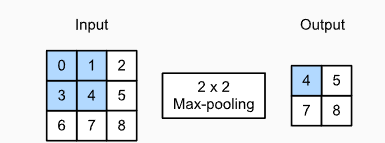



In Pooling we specify the size of pooling window, the type of pooling and the stride we want to use.

The above example illustrates 2x2 Max Pooling with stride 1 meaning that the Pooling window is of size 2x2 so the image is divide equally in regions of 2x2 grid, stride = 1 means the window shifts one pixel at a time and Max Pooling is the type of pooling where we choose the maximum value from the neighbouring cells in the pooling window.

The output feature map's size depends on the pooling window size, stride and the type of pooling and is given by:

Output size = [(n - pooling_window_size) / stride + 1]


This solves the problem of memory consumption as pooling layers reduce the dimensions of feature maps, which directly decreases the number of parameters and the memory required to store the feature maps.

It also prevents information loss as max pooling and other types of pooling retain the most important or dominant information by selecting the maximum (in the case of max pooling) value from each region. This way, key high-level features, such as edges or patterns, are preserved even as the spatial dimensions are reduced. The pooling operation ensures that only the most significant feature in each region is kept, making the model focus on important details.

Pooling introduces spatial invariance and solves the problem of Translation Variance by summarizing features over larger regions, meaning that the exact location of the feature is less important. For example, even if a feature (like an edge or texture) moves slightly within a region, max pooling will still capture the highest activation from that region. This reduces the model's sensitivity to small translations or shifts in the input, making it better at recognizing objects regardless of their position in the image.

# Types of Pooling

1.  Average Pooling
2.  Max Pooling
3. Global Pooling (both Max and Average)


In [14]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu', input_shape=(28,28,1)))


# MaxPooling reduces the size of the feature maps by downsampling. A 2x2 pool size is used with a stride of 2,
# which reduces the spatial dimensions of the input by half (e.g., 28x28 becomes 14x14).
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 113,386 (442.91 KB)

 Trainable params: 113,386 (442.91 KB)

 Non-trainable params: 0 (0.00 B)

# Advantages of Pooling

1. Reduced Memory usage
2. Transalation and Spatial Invariant
3. Enhanced Features  (Only in case of Max Pooling)
4. No Need of training

# Disadvantage of Pooling

1. **Loss of Information**: Pooling operations, especially Max Pooling, can lead to the loss of important spatial information. By only retaining the maximum (or average) value, other potentially significant features may be discarded.

2. **Reduced Spatial Resolution**: Pooling reduces the spatial dimensions of the feature maps, which can make it more challenging for the network to capture fine details in the input images.

3. **Sensitivity to Outliers**: In Max Pooling, the presence of outliers can disproportionately influence the output. A single high value in a pooling window can lead to significant changes in the feature map, potentially skewing the learned representations.

4. **Translation Invariance Limitations**: While pooling does help with translation invariance, it can also make the model less sensitive to small translations of features. This may be detrimental in cases where precise localization of features is essential such as in Image Segmentation tasks.

5. **Difficulty in Capturing Global Context**: Pooling may not effectively capture global context, particularly in scenarios where the relationships between distant pixels are crucial for understanding the overall image.

# Summary

 Explored key concepts of Convolutional Neural Networks (CNNs), including convolution operations, where filters extract important features like edges. Stride and padding control the size and precision of feature maps, with larger strides reducing map size but at the cost of precision. Pooling layers (such as Max Pooling) reduce feature map size to save memory, retain high-level features, and address translation variance, making CNNs more spatially invariant.